# Zoo: Sec01-03 Experiment Data

In [1]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    It renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        #print("Renaming: {} -> {}".format(k, v))
        dff.rename(columns={k: v}, inplace=True)
    #print(dff.head())
    return dff

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
sns.set_style("ticks")

CONF_ID = "param__header__all__config_id"

df01 = pd.read_csv("/home/manuel/sndzoo/ds_nfv_sec01/data/csv_experiments.csv")
df02 = pd.read_csv("/home/manuel/sndzoo/ds_nfv_sec02/data/csv_experiments.csv")
#df03 = pd.read_csv("/home/manuel/sndzoo/ds_nfv_sec03/data/csv_experiments.csv")

# do renaming and selection
mapping01 = {
    "param__func__mp.input__cmd_start": "flows",
    "param__func__de.upb.ids-suricata.0.1__cmd_start": "ruleset",
    "param__func__de.upb.ids-suricata.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.ids-suricata.0.1__mem_max": "mem",
    "metric__vnf0.vdu01.0__suricata_bytes": "ids_bytes",
    "metric__vnf0.vdu01.0__suricata_packets": "ids_packets",
    "metric__vnf0.vdu01.0__suricata_dropped": "ids_dropped",
    "metric__vnf0.vdu01.0__suricata_drops": "ids_drops",
}

mapping02 = {
    "param__func__mp.input__cmd_start": "flows",
    "param__func__de.upb.ids-snort2.0.1__cmd_start": "ruleset",
    "param__func__de.upb.ids-snort2.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.ids-snort2.0.1__mem_max": "mem",
    "metric__vnf0.vdu01.0__snort_bytes": "ids_bytes",
    "metric__vnf0.vdu01.0__snort_packets": "ids_packets",
    "metric__vnf0.vdu01.0__snort_dropped": "ids_dropped",
    "metric__vnf0.vdu01.0__snort_drops": "ids_drops",
}

df01 = select_and_rename(df01, mapping01)
df02 = select_and_rename(df02, mapping02)
df01["ids"] = "suricata"
df02["ids"] = "snort2"

df_list = [df01, df02]
    
# clear the data
for df in df_list:
    df["flows"] = df["flows"].str.replace("tcpreplay -i data -tK --loop 4000 --preload-pcap /pcaps/", "")
    df["flows"] = df["flows"].str.replace("Flows.pcap", "")
    df["ruleset"] = df["ruleset"].str.replace("./start.sh ", "")
    df["ruleset"] = df["ruleset"].str.replace("_ruleset", "")
    print(df.head())
    print("---")
    
df_combined = pd.concat(df_list)
#print(df_combined)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


   flows ruleset  cpu_bw  mem   ids_bytes  ids_packets  ids_dropped  \
0  small   small     0.1  256  56807971.0      90580.0    1153437.5   
1  small   small     0.1  256  55044145.0      88410.0    1170921.0   
2  small   small     0.1  256  55790912.5      89530.0    1174591.0   
3  small   small     0.1  256  55446911.5      88900.0    1160528.0   
4  small   small     0.1  256  55943834.0      89460.0    1174865.5   

   ids_drops       ids  
0   0.926838  suricata  
1   0.930098  suricata  
2   0.928717  suricata  
3   0.928233  suricata  
4   0.930354  suricata  
---
   flows ruleset  cpu_bw  mem  ids_bytes  ids_packets  ids_dropped  ids_drops  \
0  small   small     0.1  256  6567108.0       9813.0     445319.0  45.380516   
1  small   small     0.1  256  6408356.0       9814.0     440935.0  44.929183   
2  small   small     0.1  256  6406542.5       9681.0     448123.0  46.288916   
3  small   small     0.1  256  6457408.0       9825.0     441740.0  44.960814   
4  small   sma

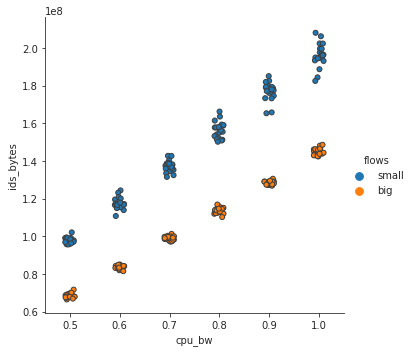

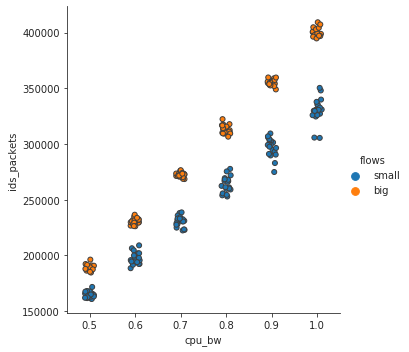

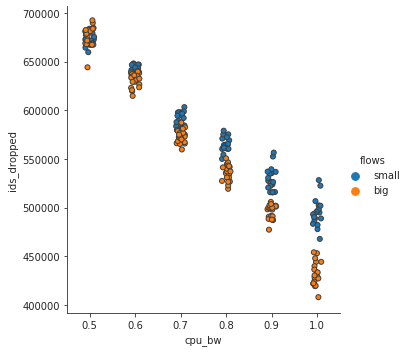

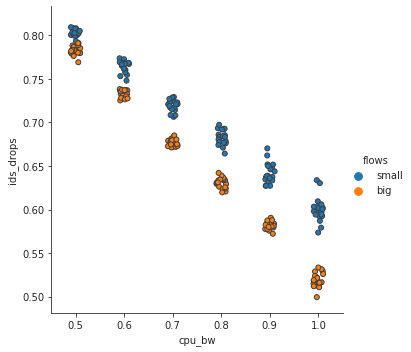

In [3]:
metrics = ["ids_bytes", "ids_packets", "ids_dropped", "ids_drops"]
hue_col = "flows"
x_col = "cpu_bw"

dff = df01.loc[df01["mem"] == 1024]
dff = dff.loc[dff["ruleset"] == "big"]
dff = dff.loc[dff[x_col] >= .5]

for m in metrics:
    sns.catplot(x=x_col, y=m, hue=hue_col, data=dff, kind="strip", height=5, aspect=1, linewidth=1)

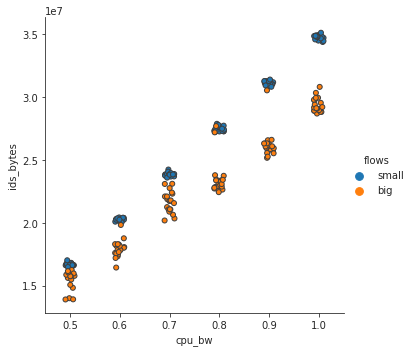

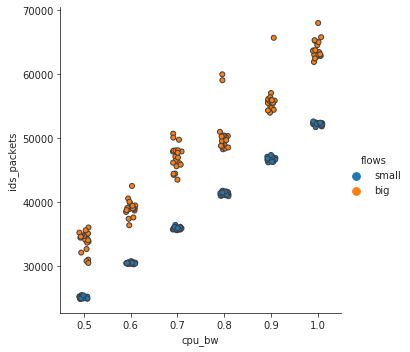

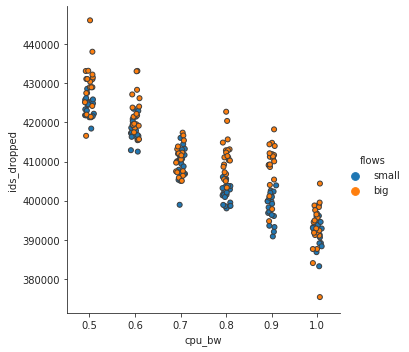

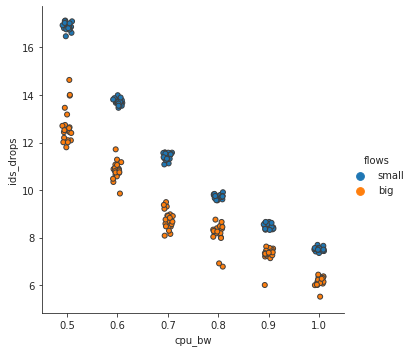

In [4]:
metrics = ["ids_bytes", "ids_packets", "ids_dropped", "ids_drops"]
hue_col = "flows"
x_col = "cpu_bw"
dff = df02.loc[df02["mem"] == 1024]
dff = dff.loc[dff["ruleset"] == "big"]
dff = dff.loc[dff[x_col] >= .5]

for m in metrics:
    sns.catplot(x=x_col, y=m, hue=hue_col, data=dff, kind="strip", height=5, aspect=1, linewidth=1)
    plt.savefig("plots/zoo_sec_scatter_{}.pdf".format(m), dpi=300)
    plt.savefig("plots/zoo_sec_scatter_{}.png".format(m), dpi=300)

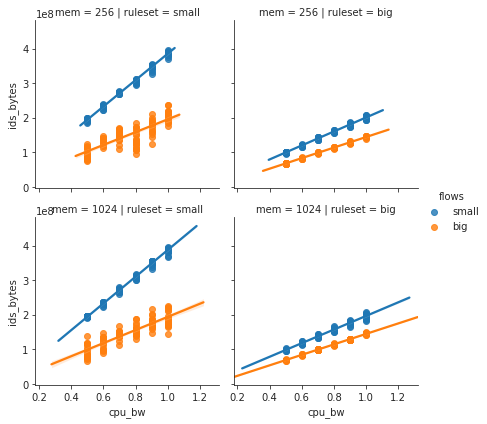

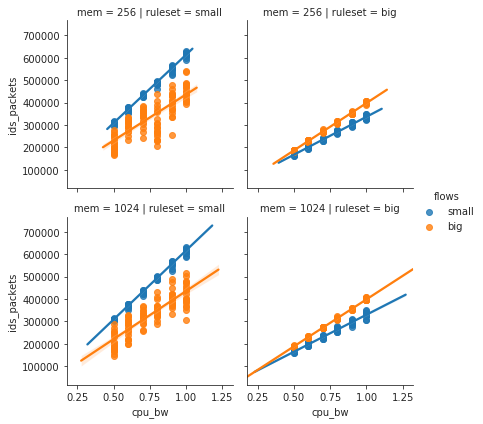

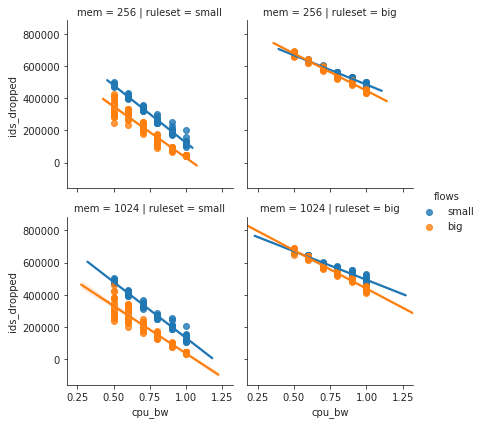

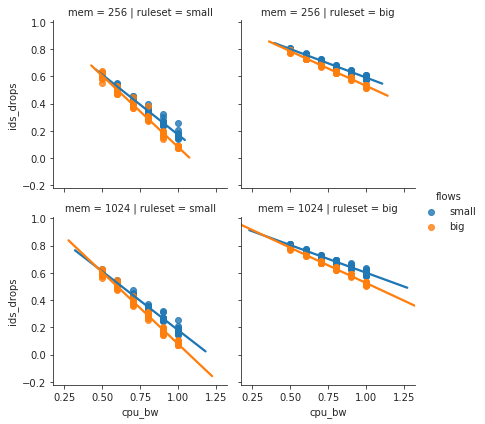

In [5]:
metrics = ["ids_bytes", "ids_packets", "ids_dropped", "ids_drops"]
hue_col = "flows"
x_col = "cpu_bw"

dff = df01
dff = dff.loc[dff[x_col] >= .5]

for m in metrics:
    sns.lmplot(x=x_col, y=m, hue=hue_col, col="ruleset", row="mem", data=dff, height=3, x_jitter=.000)

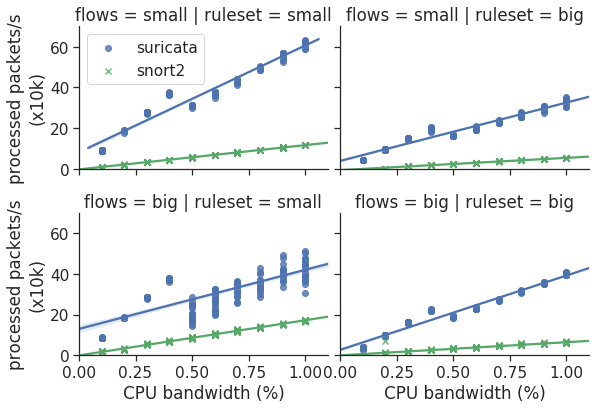

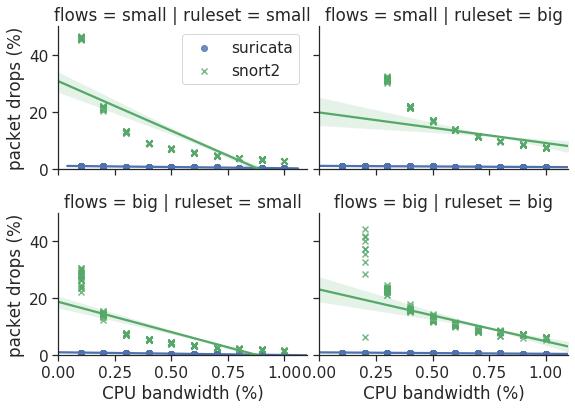

In [6]:
dff = df_combined.copy()
dff["ids_packets"] /= 10000
dff = dff.loc[dff["mem"] == 1024]
#dff = dff.loc[dff[x_col] >= .5]
sns.set(font_scale=1.4, style="ticks")

for i, m in enumerate(["ids_packets", "ids_drops"]):
    g = sns.lmplot(x="cpu_bw", y=m, hue="ids", col="ruleset", row="flows", data=dff, height=3, aspect=1.4, markers=["o", "x"], legend_out=False, order=1, palette=dict(suricata="b", snort2="g"))
    g.fig.subplots_adjust(wspace=.05)
    g.axes.flat[0].get_legend().set_title("")
    if i == 0:
        g.set(xlim=(0.0, 1.1), ylim=(0, 70))
        g.set_axis_labels("CPU bandwidth (%)", "processed packets/s\n(x10k)")
        plt.savefig("plots/zoo_sec_packets.pdf", dpi=300)
        plt.savefig("plots/zoo_sec_packets.png", dpi=300)
    else:
        g.set(xlim=(0.0, 1.1), ylim=(0, 50))
        g.set_axis_labels("CPU bandwidth (%)", "packet drops (%)")
        plt.savefig("plots/zoo_sec_drop.pdf", dpi=300)
        plt.savefig("plots/zoo_sec_drop.png", dpi=300)